In [32]:
import geopandas as gp
import pandas as pd
import numpy as np
import json
%matplotlib inline
import seaborn as sns

In [50]:
uk_df = gp.read_file('../BL_Work/Local_Authority_Districts_December_2017_Ultra_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp')

In [132]:
uk_df.head()

,bng_e,bng_n,geometry,lad17cd,lad17nm,lad17nmw,lat,long,objectid,st_areasha,st_lengths
0,447157,531476,POLYGON ((-1.243847684350774 54.72307842291248...,E06000001,Hartlepool,None,54.676159,-1.27023,1,9.658682e+07,50245.931523
1,451141,516887,POLYGON ((-1.200218340036424 54.58300135026919...,E06000002,Middlesbrough,None,54.544670,-1.21099,2,5.474167e+07,35458.505804
2,464359,519597,(POLYGON ((-1.200218311029187 54.5830013303063...,E06000003,Redcar and Cleveland,None,54.567520,-1.00611,3,2.471405e+08,78666.802657
3,444937,518183,POLYGON ((-1.193937249483723 54.62987548771687...,E06000004,Stockton-on-Tees,None,54.556911,-1.30669,4,2.064738e+08,86947.340766
4,428029,515649,POLYGON ((-1.439939711064031 54.59520822980085...,E06000005,Darlington,None,54.535351,-1.56835,5,1.982990e+08,91341.118700


In [134]:
id_to_name_district = {}
for index , row in uk_df.iterrows():
    id_to_name_district[row['lad17cd']] = row['lad17nm']

In [135]:
%store id_to_name_district

Stored 'id_to_name_district' (dict)


In [74]:
ids = list(uk_df['lad17cd'])
print len(ids)

391


In [75]:
ids

[u'E06000001',
 u'E06000002',
 u'E06000003',
 u'E06000004',
 u'E06000005',
 u'E06000006',
 u'E06000007',
 u'E06000008',
 u'E06000009',
 u'E06000010',
 u'E06000011',
 u'E06000012',
 u'E06000013',
 u'E06000014',
 u'E06000015',
 u'E06000016',
 u'E06000017',
 u'E06000018',
 u'E06000019',
 u'E06000020',
 u'E06000021',
 u'E06000022',
 u'E06000023',
 u'E06000024',
 u'E06000025',
 u'E06000026',
 u'E06000027',
 u'E06000028',
 u'E06000029',
 u'E06000030',
 u'E06000031',
 u'E06000032',
 u'E06000033',
 u'E06000034',
 u'E06000035',
 u'E06000036',
 u'E06000037',
 u'E06000038',
 u'E06000039',
 u'E06000040',
 u'E06000041',
 u'E06000042',
 u'E06000043',
 u'E06000044',
 u'E06000045',
 u'E06000046',
 u'E06000047',
 u'E06000049',
 u'E06000050',
 u'E06000055',
 u'E07000123',
 u'E06000051',
 u'E06000052',
 u'E06000053',
 u'E06000054',
 u'E06000056',
 u'E06000057',
 u'E07000004',
 u'E07000005',
 u'E07000006',
 u'E07000007',
 u'E07000008',
 u'E07000009',
 u'E07000010',
 u'E07000011',
 u'E07000012',
 u'E070000

In [66]:
uk_wellbeing_df = pd.read_csv('../BL_Work/grondTruths/Wellbeing_2.csv')

In [112]:
uk_wellbeing_df.head()

,V4_1,Data_Marking,yyyy-yy,time,admin-geography,geography,wellbeing-measureofwellbeing,allmeasuresofwellbeing,wellbeing-estimate,estimate
0,2.71,NaN,2014-15,2014-15,E06000011,East Riding of Yorkshire,anxiety,Anxiety,average-mean,Average (mean)
1,2.69,NaN,2014-15,2014-15,E07000228,Mid Sussex,anxiety,Anxiety,average-mean,Average (mean)
2,2.71,NaN,2014-15,2014-15,E07000111,Sevenoaks,anxiety,Anxiety,average-mean,Average (mean)
3,3.07,NaN,2014-15,2014-15,W06000016,Rhondda Cynon Taf,anxiety,Anxiety,average-mean,Average (mean)
4,2.35,NaN,2014-15,2014-15,E07000089,Hart,anxiety,Anxiety,average-mean,Average (mean)


In [77]:
uk_wellBeingScores = {}
for index, row in uk_wellbeing_df.iterrows():
    if row['time'] not in uk_wellBeingScores:
        uk_wellBeingScores[row['time']] = {}
    if row['allmeasuresofwellbeing'] not in uk_wellBeingScores[row['time']]:
        uk_wellBeingScores[row['time']][row['allmeasuresofwellbeing']] = {}
    if row['admin-geography'] in ids:
        uk_wellBeingScores[row['time']][row['allmeasuresofwellbeing']][row['geography']] = {}
        uk_wellBeingScores[row['time']][row['allmeasuresofwellbeing']][row['geography']]['admin_id'] = row['admin-geography']
        uk_wellBeingScores[row['time']][row['allmeasuresofwellbeing']][row['geography']]['estimate'] = row['V4_1']

In [83]:
# json.dump(uk_wellBeingScores , open('../BL_Work/UK_wellbeing_score_longitudinal.json','wb'))

In [84]:
%store uk_wellBeingScores

Stored 'uk_wellBeingScores' (dict)


In [85]:
uk_wellBeingScores.keys()

['2017-18', '2014-15', '2013-14', '2011-12', '2016-17', '2012-13', '2015-16']

In [101]:
uk_wellBeingScores['2011-12'].keys()

['Anxiety', 'Worthwhile', 'Happiness', 'Life Satisfaction']

In [86]:
uk_df.head()

,bng_e,bng_n,geometry,lad17cd,lad17nm,lad17nmw,lat,long,objectid,st_areasha,st_lengths
0,447157,531476,POLYGON ((-1.243847684350774 54.72307842291248...,E06000001,Hartlepool,None,54.676159,-1.27023,1,9.658682e+07,50245.931523
1,451141,516887,POLYGON ((-1.200218340036424 54.58300135026919...,E06000002,Middlesbrough,None,54.544670,-1.21099,2,5.474167e+07,35458.505804
2,464359,519597,(POLYGON ((-1.200218311029187 54.5830013303063...,E06000003,Redcar and Cleveland,None,54.567520,-1.00611,3,2.471405e+08,78666.802657
3,444937,518183,POLYGON ((-1.193937249483723 54.62987548771687...,E06000004,Stockton-on-Tees,None,54.556911,-1.30669,4,2.064738e+08,86947.340766
4,428029,515649,POLYGON ((-1.439939711064031 54.59520822980085...,E06000005,Darlington,None,54.535351,-1.56835,5,1.982990e+08,91341.118700


In [87]:
uk_area_df = {}
for index,row in uk_df.iterrows():
    uk_area_df[row['lad17nm'].strip()] = row['st_areasha']/1000000.0

In [88]:
uk_area_df

{u'Aberdeen City': 187.27330366665478,
 u'Aberdeenshire': 6318.628560707559,
 u'Adur': 42.24264947726849,
 u'Allerdale': 1258.3983672558686,
 u'Amber Valley': 266.5263724323912,
 u'Angus': 2192.606251482188,
 u'Antrim and Newtownabbey': 725.4320662235239,
 u'Ards and North Down': 566.6676251444193,
 u'Argyll and Bute': 7069.747587999689,
 u'Armagh City, Banbridge and Craigavon': 1435.7838952074994,
 u'Arun': 222.75883749322915,
 u'Ashfield': 109.15939324743988,
 u'Ashford': 582.2739854446676,
 u'Aylesbury Vale': 907.2872422766098,
 u'Babergh': 593.5329806784687,
 u'Barking and Dagenham': 36.01722667823324,
 u'Barnet': 86.53059545790168,
 u'Barnsley': 330.51346024451675,
 u'Barrow-in-Furness': 75.68658775143524,
 u'Basildon': 111.9086405980918,
 u'Basingstoke and Deane': 634.5608311532131,
 u'Bassetlaw': 639.0785321634792,
 u'Bath and North East Somerset': 348.24741293227436,
 u'Bedford': 474.1924310848839,
 u'Belfast': 137.77422054740745,
 u'Bexley': 62.3940910514797,
 u'Birmingham': 2

In [89]:
IMD_summarised = pd.read_csv('../BL_Work/File_10_ID2015_Local_Authority_District_Summaries.csv')

In [90]:
summarized_IMD = {}
for index , row in IMD_summarised.iterrows():
    summarized_IMD[row['Local Authority District name (2013)'].strip()] = row ['IMD - Average score']
summarized_IMD

{'Adur': 18.275,
 'Allerdale': 22.55,
 'Amber Valley': 18.116,
 'Arun': 17.671,
 'Ashfield': 25.416,
 'Ashford': 17.333,
 'Aylesbury Vale': 11.175,
 'Babergh': 15.148,
 'Barking and Dagenham': 34.635,
 'Barnet': 17.813,
 'Barnsley': 29.568,
 'Barrow-in-Furness': 31.4,
 'Basildon': 23.618000000000002,
 'Basingstoke and Deane': 11.495999999999999,
 'Bassetlaw': 22.729,
 'Bath and North East Somerset': 12.094000000000001,
 'Bedford': 19.238,
 'Bexley': 16.17,
 'Birmingham': 37.768,
 'Blaby': 10.374,
 'Blackburn with Darwen': 34.189,
 'Blackpool': 41.997,
 'Bolsover': 24.778000000000002,
 'Bolton': 28.42,
 'Boston': 24.366999999999997,
 'Bournemouth': 21.846999999999998,
 'Bracknell Forest': 10.462,
 'Bradford': 33.168,
 'Braintree': 15.312999999999999,
 'Breckland': 19.789,
 'Brent': 26.655,
 'Brentwood': 9.881,
 'Brighton and Hove': 23.441,
 'Bristol, City of': 27.160999999999998,
 'Broadland': 11.065,
 'Bromley': 15.164000000000001,
 'Bromsgrove': 11.071,
 'Broxbourne': 17.294,
 'Broxto

In [131]:
np.mean(summarized_IMD.values())

19.46361963190184

In [91]:
IMD_df = pd.read_csv('../BL_Work/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv')

In [92]:
IMD_df.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031349,Adur 001A,E07000223,Adur,12.389,21352,7,0.096,18992,6,...,20379,7,0.312,11318,4,1318,206,694,418,702.75
1,E01031350,Adur 001B,E07000223,Adur,28.619,8864,3,0.187,9233,3,...,16285,5,0.234,12445,4,1212,232,712,268,720.75
2,E01031351,Adur 001C,E07000223,Adur,11.713,22143,7,0.065,24539,8,...,25054,8,0.208,12820,4,1577,290,829,458,838.25
3,E01031352,Adur 001D,E07000223,Adur,16.446,17252,6,0.117,16087,5,...,24455,8,0.109,14350,5,1453,233,739,481,748.25
4,E01031370,Adur 001E,E07000223,Adur,18.265,15643,5,0.102,17918,6,...,20214,7,0.321,11202,4,1443,306,799,338,795.50


In [123]:
len(set(IMD_df['Local Authority District code (2013)']))

326

In [107]:
deprivation_keys = ['Income Score (rate)','Employment Score (rate)','Education, Skills and Training Score','Crime Score','Barriers to Housing and Services Score','Living Environment Score','Health Deprivation and Disability Score','Total population: mid 2012 (excluding prisoners)'] 
life_keys = ['Anxiety', 'Worthwhile', 'Happiness', 'Life Satisfaction']

In [108]:
len(deprivation_keys)

8

In [136]:
IMD_District = {}
for name , group in IMD_df.groupby('Local Authority District name (2013)'):
    IMD_District[name] = {}
    IMD_District[name]['District Code'] = list(set(group['Local Authority District code (2013)']))
    IMD_District[name]['IMD'] = {}
    IMD_District[name]['IMD']['median_values'] = {}
    IMD_District[name]['IMD']['mean_values'] = {}
    IMD_District[name]['Life Values']= {}
    
    for k in deprivation_keys[:-1]:
        IMD_District[name]['IMD']['median_values'][k] = np.median(group[k])
        IMD_District[name]['IMD']['mean_values'][k] = np.mean(group[k])
    IMD_District[name]['population'] = np.sum(group[deprivation_keys[-1]])
    IMD_District[name]['aggregate_IMD'] = summarized_IMD[name]
    IMD_District[name]['pop_density'] = IMD_District[name]['population']/uk_area_df[name]
    IMD_District[name]['senior_pop'] = float(np.sum(group['Older population aged 60 and over: mid 2012 (excluding prisoners)']))/float(np.sum(group[deprivation_keys[-1]]))
    for k in life_keys:
        val = -1
        if not np.isnan(uk_wellBeingScores['2011-12'][k][name]['estimate']):
            val = uk_wellBeingScores['2011-12'][k][name]['estimate']
        IMD_District[name]['Life Values'][k] = val
    
    

In [137]:
IMD_District

{'Adur': {'District Code': ['E07000223'],
  'IMD': {'mean_values': {'Barriers to Housing and Services Score': 17.706571428571433,
    'Crime Score': -0.1049047619047619,
    'Education, Skills and Training Score': 28.01047619047619,
    'Employment Score (rate)': 0.10511904761904763,
    'Health Deprivation and Disability Score': -0.005071428571428567,
    'Income Score (rate)': 0.12354761904761905,
    'Living Environment Score': 18.868476190476194},
   'median_values': {'Barriers to Housing and Services Score': 17.7195,
    'Crime Score': 0.030500000000000003,
    'Education, Skills and Training Score': 26.0565,
    'Employment Score (rate)': 0.086,
    'Health Deprivation and Disability Score': -0.0365,
    'Income Score (rate)': 0.10250000000000001,
    'Living Environment Score': 17.901}},
  'Life Values': {'Anxiety': -1,
   'Happiness': -1,
   'Life Satisfaction': 56.42,
   'Worthwhile': 45.7},
  'aggregate_IMD': 18.275,
  'pop_density': 1466.0302032741834,
  'population': 61929,

In [138]:
IMD_District['City of London']

{'District Code': ['E09000001'],
 'IMD': {'mean_values': {'Barriers to Housing and Services Score': 31.176500000000004,
   'Crime Score': -1.1770000000000003,
   'Education, Skills and Training Score': 4.410666666666667,
   'Employment Score (rate)': 0.05100000000000001,
   'Health Deprivation and Disability Score': -0.782,
   'Income Score (rate)': 0.06466666666666666,
   'Living Environment Score': 49.3525},
  'median_values': {'Barriers to Housing and Services Score': 31.503500000000003,
   'Crime Score': -0.9884999999999999,
   'Education, Skills and Training Score': 0.873,
   'Employment Score (rate)': 0.024,
   'Health Deprivation and Disability Score': -0.607,
   'Income Score (rate)': 0.0215,
   'Living Environment Score': 42.7215}},
 'Life Values': {'Anxiety': -1,
  'Happiness': -1,
  'Life Satisfaction': -1,
  'Worthwhile': -1},
 'aggregate_IMD': 13.602,
 'pop_density': 2467.576565047199,
 'population': 7604,
 'senior_pop': 0.20765386638611258}

In [139]:
vals = [IMD_District[area]['aggregate_IMD'] for area in IMD_District]
print np.mean(vals)

19.463619631901842


In [140]:
len(IMD_District)

326

In [141]:
json.dump(IMD_District , open('District_IMD_scores_life_values.json','wb'))

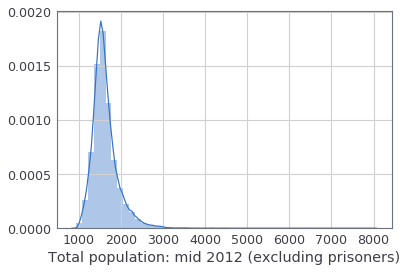

In [120]:
sns.distplot(IMD_df[deprivation_keys[7]])